This initiative is to support the marketing team by offering resources and insights that improve their approaches and decision-making procedures. The system can provide useful insights on market trends, product performance, and consumer behaviour by utilising data analytics. The marketing team can improve their outreach efforts overall, target audiences more precisely, and fine-tune their campaigns thanks to this data-driven strategy.

The creation of an advanced inventory system aims to automate and simplify the process of managing product inventories. Real-time inventory level monitoring will be provided by the system, which will also issue alarms when quantities drop below predetermined levels. In addition to preventing stockouts, this proactive warning system makes sure that the marketing team is aware of the availability of products. By integrating such a system, overall operational efficiency is improved and the danger of lost sales opportunities owing to inadequate inventory is reduced.


In [1]:
import pandas as pd

In [2]:
# have a look at the transaction data
df = pd.read_csv('Data/transaction.csv' , delimiter=';')
df.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
180,TR33225,286,13/01/2022,P1,8800,3,26400,4
4041,TR69752,42,20/10/2022,P4,12000,3,36000,7
2462,TR81972,347,25/06/2022,P3,7500,3,22500,5
1769,TR86133,77,07/05/2022,P10,15000,2,30000,6
495,TR96549,252,04/02/2022,P5,4200,4,16800,3


In [3]:
# have a look at the the store data
df1 = pd.read_csv('Data/Store.csv' , delimiter = ';')
df1.sample(5)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
13,14,Priangan,Priangan,Modern Trade,"-5,45","105,26667"
11,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
10,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"


In [4]:
# have a look at the product data
df2 = pd.read_csv('Data/Product.csv' , delimiter = ';')
df2.sample(5)

,ProductID,Product Name,Price
6,P7,Coffee Candy,9400
9,P10,Cheese Stick,15000
1,P2,Ginger Candy,3200
7,P8,Oat,16000
4,P5,Thai Tea,4200


In [5]:
"""joining the 3 data sets to create one data set 
with only te features that we are going to need for our modelling"""

from pandasql import sqldf

query = """SELECT 
    t.TransactionID,
    t.CustomerID,
    t.Date,
    t.ProductID,
    t.Price,
    t.Qty,
    t.TotalAmount,
    t.StoreID,
    s.StoreName
FROM 
    df t
INNER JOIN 
    df1 s ON t.StoreID = s.StoreID"""
pysqldf = sqldf(query)
result = pysqldf
result
result_df = pd.DataFrame(result)

In [6]:
result_df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara


In [7]:
from pandasql import sqldf

query1 = """SELECT 
    t.TransactionID,
    t.CustomerID,
    t.Date,
    t.ProductID,
    t.Price,
    t.Qty,
    t.TotalAmount,
    t.StoreID,
    t.StoreName,
    s. `Product Name`
FROM 
    result_df t
INNER JOIN 
    df2 s ON t.ProductID  = s.ProductID """

pysqldf = sqldf(query1)
result2 = pysqldf
result2
df = pd.DataFrame(result2)

In [8]:
df.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,Product Name
2123,TR56344,66,02/06/2022,P4,12000,2,24000,4,Gita Ginara,Potato Chip
1743,TR90657,127,05/05/2022,P10,15000,5,75000,10,Harapan Baru,Cheese Stick
2132,TR21630,378,03/06/2022,P10,15000,3,45000,3,Prima Kota,Cheese Stick
3408,TR14437,29,05/09/2022,P2,3200,5,16000,9,Lingga,Ginger Candy
4503,TR8726,260,23/11/2022,P10,15000,5,75000,3,Prima Kota,Cheese Stick


In [9]:
df['Date']= pd.to_datetime(df['Date'])

In [10]:
# df= df.set_index('Date')


In [11]:
df.tail()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,Product Name
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3,Prima Kota,Cheese Stick
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9,Lingga,Ginger Candy
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9,Lingga,Coffee Candy
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13,Buana,Oat
5019,TR85684,55,2022-12-31,P8,16000,1,16000,6,Lingga,Oat


In [12]:
# check for null values.
"""There are no null values"""
df.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
StoreName        0
Product Name     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
 8   StoreName      5020 non-null   object        
 9   Product Name   5020 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 392.3+ KB


In [14]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


##  EDA



marketing department. help them identify popular products
sale trends 
sale seasonality.
stores with the best sales. 

### Modelling

In [15]:
# check for stationarity of our data isong adfuller

In [16]:
from statsmodels.tsa.stattools import adfuller
column_to_check = 'Qty'
time_series = df[column_to_check]
output = adfuller(time_series)
p_value = output[1]

if p_value < 0.05:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

    """null hypothesis is that the time series  is non-stationary)."""

Reject the null hypothesis.


In [17]:
from scipy.stats import norm
import numpy as np
average_demand_rate = df['Qty'].mean()
demand_std_dev = df['Qty'].std()

# Set the desired service level 
service_level = 0.95  #ability to meet customer demand

# Calculate the Z-score corresponding to the service level
z_score = norm.ppf(service_level)

# Assuming 'Lead Time' is in days
lead_time = 2 #how long it takes for products to be restocked

# Calculate safety stock
safety_stock = z_score * demand_std_dev * np.sqrt(lead_time)

print(f"Safety Stock: {safety_stock}")

Safety Stock: 4.315740413985662


## Facebook Prophet

In [18]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [19]:
# rename the variables as is expected 
df.rename(columns={'Date': 'ds', 'Qty': 'y'}, inplace=True)

In [20]:
# find aggregate daily product sales.
df_aggregated = df.groupby('ds')['y'].sum()

In [21]:
# change it to a data frame from a series
df_aggregated = pd.DataFrame(df_aggregated)
df_aggregated.head(6)

,y
ds,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
2022-01-06,67


In [22]:
# reset the indext
df_aggregated.reset_index(inplace=True)

In [23]:
# instantiate the model
model = Prophet() 

# fit our model
model.fit(df_aggregated)

# find the last day a sale was made in our dataset
last_date = df_aggregated['ds'].max()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


make_future_dataframe method in the Prophet library does not have a start parameter. The correct way to create a future dataframe with a specified start date is to use the add_datepart function from the fastai library. Here's the corrected code:

In [55]:
from fastai.tabular.all import add_datepart
last_date = pd.to_datetime(df_aggregated['ds'].max())

# Create the future dataframe starting from the day after the last date
future = model.make_future_dataframe(periods=365, freq='D')

In [56]:
future = future[future['ds'] > last_date]

In [57]:
# Python

"""The predict method will assign each row in future a predicted value which it names yhat. 
If you pass in historical dates, it will provide an in-sample fit.
 The forecast object here is a new dataframe that includes a column yhat with the forecast,
 as well as columns for components and uncertainty intervals."""
# yhat is the he predictedquantity ordered for the corresponding date. 
# yhat_lower. true value will not go beyind this point
# yhat_upper true value will not exceed this point. meaning there wont be more than 5 orders made on that day basing
# our prediction on the data we have.


forecast = model.predict(future)
forecast['yhat'] = round(forecast['yhat'], 0)
forecast['yhat_lower'] = round(forecast['yhat_lower'], 0)
forecast['yhat_upper'] = round(forecast['yhat_upper'], 0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2023-12-27,42.0,20.0,63.0
361,2023-12-28,42.0,21.0,63.0
362,2023-12-29,37.0,18.0,58.0
363,2023-12-30,40.0,18.0,60.0
364,2023-12-31,41.0,20.0,64.0


In [58]:
forecast.shape

(365, 16)

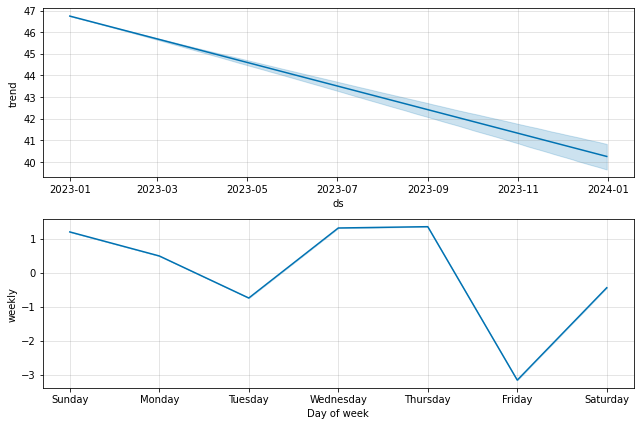

In [59]:
fig2 = model.plot_components(forecast)

In [60]:
y_true = df_aggregated['y'].values
y_pred = forecast['yhat'].values

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse

(13.745205479452055, 321.0383561643836, 17.91754325136076)

In this case, the MAE, MSE, and RMSE values are all relatively high, which suggests that the model is not performing very well.

In [65]:
from statsmodels.tsa.arima.model import ARIMA
ts = df_aggregated.set_index('ds')['y']

# Fit an ARIMA model
order = (1, 1, 1)  # replace p, d, q with appropriate values
model_arima = ARIMA(ts, order=order)
fit_arima = model_arima.fit()

# Forecast future values
forecast_steps = 365  # replace with the number of steps you want to forecast
forecast_arima = fit_arima.get_forecast(steps=forecast_steps)

# Get the forecast values and confidence intervals
forecast_values = forecast_arima.predicted_mean
forecast_conf_int = forecast_arima.conf_int()

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [67]:
forecast_conf_int

,lower y,upper y
2023-01-01,15.356425,80.868437
2023-01-02,15.192028,80.704434
2023-01-03,15.189033,80.712281
2023-01-04,15.183705,80.717537
2023-01-05,15.178413,80.722830
...,...,...
2023-12-27,13.345646,82.555597
2023-12-28,13.340634,82.560609
2023-12-29,13.335623,82.565620
2023-12-30,13.330613,82.570630


In [68]:
forecast_values = pd.DataFrame (forecast_values)
forecast_values.head(5)

,predicted_mean
2023-01-01,48.112431
2023-01-02,47.948231
2023-01-03,47.950657
2023-01-04,47.950621
2023-01-05,47.950622


In [69]:
actual_values = df_aggregated['y']

In [71]:
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
rmse

16.82278459470127

In [74]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [79]:
df['DayOfWeek'] = df['ds'].dt.dayofweek
df['Month'] = df['ds'].dt.month
df['Year'] = df['ds'].dt.year

# Select relevant features
features = ['DayOfWeek', 'Month', 'Year', 'Price', 'y', 'TotalAmount']

# Split the data into training and testing sets
train, test = train_test_split(df[features], test_size=0.2, shuffle=False)

# Fit SARIMAX model
order = (1, 1, 1)  # Replace with appropriate values based on model selection
seasonal_order = (1, 1, 1, 12)  # Replace with appropriate values

model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit()

# Make predictions on the test set
predictions = fit_model.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Calculate RMSE
rmse = mean_squared_error(test['y'], predicted_values, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.7744797426282723


In [82]:
train, test = train_test_split(df[features], test_size=0.2, shuffle=False)

# Naive Forecast (predicting the last observed value)
naive_forecast = test['y'].shift(1).fillna(method='bfill')

# Calculate RMSE for the Naive Forecast
rmse_naive = mean_squared_error(test['y'], naive_forecast, squared=False)
print(f"RMSE for Naive Forecast: {rmse_naive}")


RMSE for Naive Forecast: 2.4836116228643905


In [83]:
alert_threshold = 0.1 * safety_stock

# Calculate available stock
available_stock = predicted_values - safety_stock

# Check if available stock is below the alert threshold
if available_stock < alert_threshold:
    print("ALERT: Stock running low! Consider restocking.")
else:
    print("Stock level is satisfactory.")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

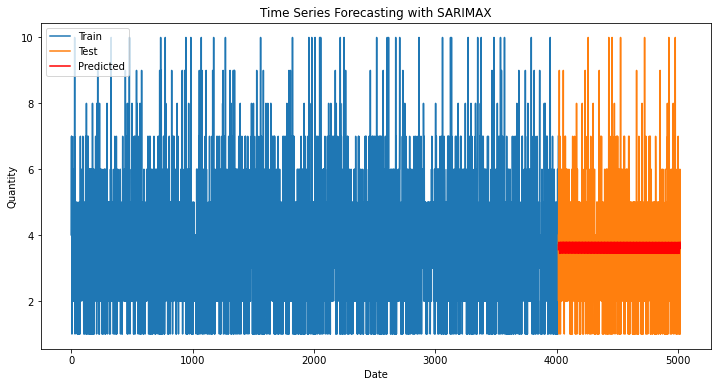

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['y'], label='Train')
plt.plot(test.index, test['y'], label='Test')
plt.plot(test.index, predicted_values, label='Predicted', color='red')
plt.title('Time Series Forecasting with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [86]:
# Function to calculate safety stock
def calculate_safety_stock(predicted_quantity, demand_std_dev, lead_time, service_level):
    z_score = norm.ppf(service_level)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time)
    return safety_stock


# Function to check and generate alert
def check_and_alert(predicted_quantity, safety_stock, alert_threshold):
    available_stock = predicted_quantity - safety_stock
    if available_stock < alert_threshold:
        print("ALERT: Stock running low! Consider restocking.")
    else:
        print("Stock level is satisfactory.")

def get_predicted_quantity(train, order, seasonal_order, steps=30):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    fit_model = model.fit()
    predictions = fit_model.get_forecast(steps=steps)
    predicted_values = predictions.predicted_mean
    return predicted_values

def automate_alert_threshold(safety_stock, percentage_threshold=0.1):
    return safety_stock * percentage_threshold
order = (1, 1, 1)  # Replace with your actual order
seasonal_order = (1, 1, 1, 12)  # Replace with your actual seasonal_order
demand_std_dev = 10  # Replace with your actual value
lead_time = 7  # Replace with your actual value
service_level = 0.95  # Replace with your actual value

np.random.seed(42)
train_data = np.random.normal(loc=100, scale=10, size=300)

# Get the most recent predicted quantity using SARIMA
predicted_quantity = get_predicted_quantity(train_data, order, seasonal_order)

# Calculate safety stock using retrieved parameters
safety_stock = calculate_safety_stock(predicted_quantity[-1], demand_std_dev, lead_time, service_level)

# Automate alert threshold based on a percentage of safety stock
alert_threshold = automate_alert_threshold(safety_stock)

# Check and generate alert using automated alert threshold
check_and_alert(predicted_quantity[-1], safety_stock, alert_threshold)

Stock level is satisfactory.


In [85]:
demand_std_dev = 10  # Replace with your actual value
lead_time = 7  # Replace with your actual value
service_level = 0.95  # Replace with your actual value

def calculate_safety_stock(predicted_quantity, demand_std_dev, lead_time, service_level):
    z_score = norm.ppf(service_level)
    safety_stock = z_score * demand_std_dev * np.sqrt(lead_time)
    return safety_stock

# Function to check and generate alert
def check_and_alert(predicted_quantity, safety_stock, alert_threshold):
    available_stock = predicted_quantity - safety_stock
    if available_stock < alert_threshold:
        print("ALERT: Stock running low! Consider restocking.")
    else:
        print("Stock level is satisfactory.")

# Function to get the most recent predicted quantity (replace this with your actual implementation)
def get_predicted_quantity():
    # Replace this with logic to fetch the predicted quantity from your forecasting model or database
    # For now, let's assume a constant value for demonstration purposes
    return 100

# User input for safety stock
safety_stock_input = float(input("Enter the safety stock: "))
alert_threshold_input = float(input("Enter the alert threshold: "))

# Get the most recent predicted quantity
predicted_quantity = get_predicted_quantity()

# Assuming you have these parameters available (replace with actual values)
demand_std_dev = 10  # Replace with your actual value
lead_time = 7  # Replace with your actual value
service_level = 0.95  # Replace with your actual value

# Calculate safety stock using retrieved parameters
safety_stock = calculate_safety_stock(predicted_quantity, demand_std_dev, lead_time, service_level)

# Check and generate alert using user input for safety stock and alert threshold
check_and_alert(predicted_quantity, safety_stock_input, alert_threshold_input)

ValueError: could not convert string to float: ''